# Lord of the Rings - Explainer notebook

This notebook is part B of the final project for the course Social graphs and interactions (02805) in the Fall of 2021.

![Alt Text](https://i.imgur.com/fVDH5bN.gif)

# Table of contents
* 1. [Motivation](#motivation)
* 2. [Basic stats](#basicstats)
  * 2.1 [Data cleaning and preprocessing](#datacleaningandpreprocessing)
    * 2.1.1 [Books](#2.1.1books)
    * 2.1.2 [Transcripts](#2.1.2transcripts)
    * 2.1.3 [Wikis](#2.1.3wikis)
  * 2.2 [Dataset stats](#datasetstats)
    * 2.2.1 [Books](#2.2.1books)
    * 2.2.2 [Transcripts](#2.2.2transcripts)
    * 2.2.3 [Wikis](#2.2.3wikis)
* 3. [Tools, theory and analysis](#tools)
  * 3.1 [Books](#3.1books)
  * 3.2 [Scripts](#3.2transcripts)
  * 3.3 [Wikis](#3.3wikis)
  * 3.4 [Comparison - Books and Movies](#3.4booksmovies)
* 4. [Discussion](#discussion)
* 5. [Contributions](#contributions)

# 1. Motivation <a name="motivation"></a>
 ####  What is your dataset?
There are multiple different datasets used for this analysis:
  1. #### Books
    * The text files for all the Lord of the Rings books where downloaded from the internet.
      * http://www.glozman.com/textpages.html
  2. #### Movie transcripts
    * Some text explaining
      * link
      * link
      * link
  

3. #### Wiki pages
The Lord of the Rings fandom wiki was used as a datasource. From the wiki a list of characters for each of the three movies was downloaded. The character lists were combined and saved in the file:

    * characters.csv
    
Using that list the wiki page for each character was extracted. In total 121 files were downloaded, which are 1,24MB in total.

* #### Why did you choose this/these particular dataset(s)?
These particular datasets were chosen ...

Each dataset was chosen for different reasons. 

The books are used to perform natural language processing. They will be used to analyze the sentiment for each chapter in the books, the distribution of interesting words throughout the books and generate word clouds of frequently used words, among other things.

The transcripts of the movies are used for natural language processing aswell. As the transcripts specify which character says throughout each movie, they can easily be used to analyze the sentiment of major characters, create word clouds for those characters and generate word clouds for each of the movies, to compare to the books.

The wikis are the primary source of information for each character. As the wikis use hyperlinks when refrencing other characters, they can be used generate a network of the characters, where each refrence is represented as a link. On each character wiki page there is also information about the characters race, gender and culture, which will analyzed as well.

* #### What was your goal for the end user's experience?
The goal was a fun webpage...

The video below highlights the project idea:

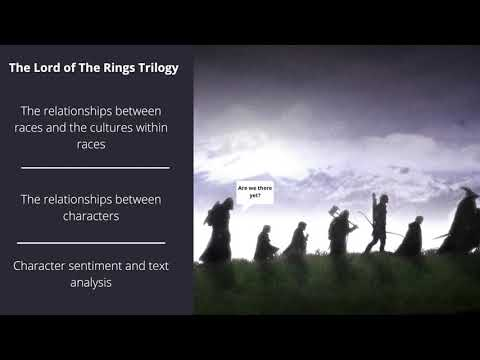

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('8R3iaZLClng', width=800, height=450)

# 2. Basic stats. Let's understand the dataset better <a name="basicstats"></a>

In [1]:
# Imports
import networkx as nx
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from fa2 import ForceAtlas2
from community import community_louvain
import matplotlib.cm as cm
from collections import Counter

## 2.1 Write about your choices in data cleaning and preprocessing <a name="datacleaningandpreprocessing"></a>

### 2.1.1 Books <a name="2.1.1books"></a>

### 2.1.2 Transcripts <a name="2.1.2transcripts"></a>

The transcripts were downloaded as HTML files from the web. BeautifulSoup was used to remove the HTML tags and only leaving behind the content, i.e. the transcripts themselves. These parsed versions were saved to seperate files.

The descriptions of what was going on onscreen from each transcript was removed. These lines are known as action lines. These action lines varied in their denotions. For the "Two towers", the action lines was denoted by square brackets. Once these action lines had been removed, all there is left is just the spoken words of the characters. This cleaned transcript was saved in a separate file.

### 2.1.3 Wikis <a name="2.1.3wikis"></a>

The wikis were well structed and followed the same layout, however a few of them had to be polished. The wiki for Frodo Baggins had to be parsed as the information about race and culture was all squashed together. Also, for Frodo, it was noticed that Frodo Baggins had no race specified on his wiki, at the time of retrival. This is a trivial error, so hice race(hobbits), was added to his description.

The wiki page Shelob had to be edited a bit aswell. In the culture section a \<ref\>\Some text</ref\> as it was messing up the culture attribute for that character.

The page for the "Witch-king of Angmar" specified the race (Men) in singular, this was changed to "Men" to be consistant with the rest of the data set. Similarly for "Meriadoc Brandybuck","Hamfast Gamgee" and "Lobelia Sackville-Baggins", their race was changed from "Hobbit" to "Hobbits" to be consistant with the rest of the data.

## 2.2 Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A) <a name="datasetstats"></a>

### 2.2.1 Books <a name="2.2.1books"></a>

### 2.2.2 Transcripts <a name="2.2.2transcripts"></a>

### 2.2.3 Wikis <a name="2.2.3wikis"></a>

# 3. Tools, theory and analysis <a name="tools"></a>

* Talk about how you've worked with text, including regular expressions, unicode, etc.
* Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.
* How did you use the tools to understand your dataset?

## 3.1 Books <a name="3.1books"></a>

## 3.2 Transcripts <a name="3.2transcripts"></a>

## 3.3 Wikis <a name="3.3wikis"></a>

## 3.4 Comparison - Books and Movies <a name="3.4booksmovies"></a>

# 4. Discussion <a name="discussion"></a>

* What went well?
* What is still missing? What could be improved?, Why?

# 5. Contributions <a name="contributions"></a>

* You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That’s what you should explain).
* It is not OK simply to write "All group members contributed equally".

![Alt Text](https://i.imgur.com/2TxUe1G.gif)